# Mesuring engaggment in Human Avatar interaction

In [1]:
import os
# set directory
os.chdir(r'C:\Users\naama\Desktop\Chen\לימודים\Xoltar')
os.getcwd()

'C:\\Users\\naama\\Desktop\\Chen\\לימודים\\Xoltar'

### Parsing the experiment data

In [4]:
import pandas as pd
import json
from datetime import datetime

def load_experiment_data(path):
  json_data = open(path).read()
  json_data = json_data.split("!$$SEP$$!")
  data = []
  for item in json_data:
    if '\n' in item:
      item = item.split('\n')
      n = len(item)
      for i in range(n):
        if item[i]:  # Check if item is not empty
          data.append(json.loads(item[i]))
    else:
      if item:  # Check if item is not empty
        data.append(json.loads(item))
  df = pd.DataFrame(data)

  # Convert time to datetime
  date_format = "%Y-%m-%d_%Hh%M.%S.%f"
  df['date'] = df['date'].apply(lambda x: datetime.strptime(x, date_format))
  df['absTime'] = df['absTime'].apply(lambda x: datetime.strptime(x, date_format))
  df.drop('expName', axis=1, inplace=True)
  
  return df

In [75]:
avatar_first_office_results_path = r'C:\Users\naama\Desktop\Chen\לימודים\Xoltar\jatos_results_data_20240707053334.txt'
avatar_first_office = load_experiment_data(avatar_first_office_results_path)

### Filtering data:
- Filtering only "next_button_pushed" event
- Excluding users who failed the catch video - comment contains "o" and "k"; choice is "1.0"
- Nerowing to the columns 'workerID', 'videoFile', and 'choice'

In [115]:
def filter_data(df):
    df = df[df['event']=='next_button_pushed']
    catch_ids = df[
        (df['videoFile'].str.lower() == 'catch') &
        (df['comment'].str.lower().str.contains('o') & df['comment'].str.lower().str.contains('k')) &
        (df['choice'] == 1.0)
        ]['workerID'].unique()
    didt_catch_ids = df[~df['workerID'].isin(catch_ids)]['workerID'].unique()
    # Filter catch videos
    df = df[df['videoFile'].str.lower() != 'catch']
    df = df[df['workerID'].isin(catch_ids)][['workerID', 'videoFile', 'choice']]
    print(f"Number of participants who didn't catch the catch video: {len(didt_catch_ids)}")
    print(f"Participants who didn't catch the catch video: {didt_catch_ids}")
    return df

avatar_first_office_filtered = filter_data(avatar_first_office)

Number of participants who didn't catch the catch video: 1
Participants who didn't catch the catch video: ['XA1719924308735X']


# First-Avatar experiment
### Tests interaction where only the avatar is speaking

Presenting the first frame of the selected sliced videos for the first-Avatar interaction experiment

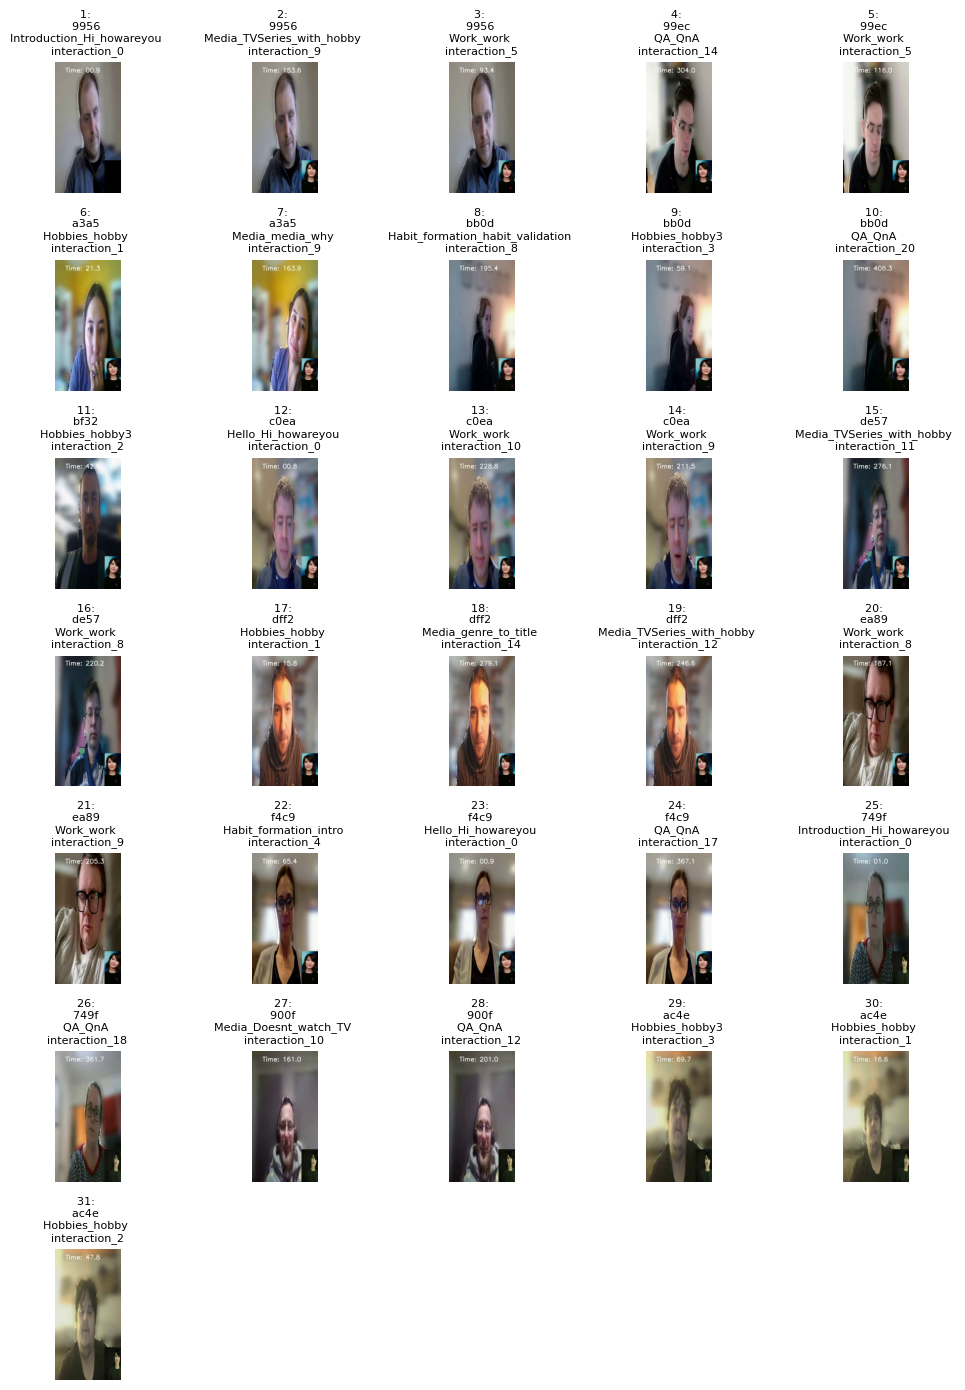

In [154]:
avatar_first_videos_path = r"C:\Users\naama\Desktop\Chen\לימודים\Xoltar\Avatar interaction test"

import os
import cv2
from matplotlib import pyplot as plt
import re

def show_first_frame_of_videos(path):
    # Get a list of all files in the directory
    files = os.listdir(path)
    # Filter out the video files (assuming common video formats)
    video_files = [file for file in files if file.endswith(('.mp4'))]
    
    # Order the video files by tester ID
    video_files.sort(key=lambda x: re.search(r"_([0-9a-f]{24})_", x).group(1))

    # Define the number of columns for the grid
    num_cols = 5
    num_videos = len(video_files)
    num_rows = (num_videos + num_cols - 1) // num_cols  # Calculate the number of rows needed

    video_files_idx = {video_file: idx for idx, video_file in enumerate(video_files)}
    video_frames_dict = {}

    # Create a figure with a specified size
    plt.figure(figsize=(num_cols * 2, num_rows * 2))  # Adjust figure size as needed
    
    # Loop through each video file
    for idx, video_file in enumerate(video_files):
        # Create the full path to the video file
        video_path = os.path.join(path, video_file)

        tester_id = re.search(r"_([0-9a-f]{24})_", video_file).group(1)
        tester_id = tester_id[-4:]  # Extract the last 4 characters of the tester_id

        section = re.search(r"^(.*?)_[0-9a-f]{24}_interaction_\d+\.mp4$", video_file).group(1)
        interaction = re.search(r"interaction_(\d+)\.mp4$", video_file).group(1)

        # Capture the video
        cap = cv2.VideoCapture(video_path)
        
        # Read the first frame
        ret, frame = cap.read()
        
        if ret:
            # Convert the frame to RGB (OpenCV uses BGR by default)
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            # Add subplot to the grid
            plt.subplot(num_rows, num_cols, idx + 1)
            plt.imshow(frame_rgb)
            plt.title(f"{idx+1}: \n{tester_id} \n{section} \ninteraction_{interaction}", fontsize=8)
            plt.axis('off')
            
            # Save the first frame in the dictionary
            video_frames_dict[idx] = frame_rgb
        
        # Release the video capture object
        cap.release()
    
    # Adjust layout
    plt.tight_layout()
    # Show the grid
    plt.show()

    # Remove ".mp4" from video_files_idx keys
    video_files_idx = {re.sub(r"\.mp4$", "", video_file): idx for video_file, idx in video_files_idx.items()}
    
    return video_files_idx, video_frames_dict

video_files_idx, video_frames_dict = show_first_frame_of_videos(avatar_first_videos_path)

In [112]:
video_files_idx

{'Introduction_Hi_howareyou_65e73c98c25ac20fa0cb9956_interaction_0': 0,
 'Media_TVSeries_with_hobby_65e73c98c25ac20fa0cb9956_interaction_9': 1,
 'Work_work_65e73c98c25ac20fa0cb9956_interaction_5': 2,
 'QA_QnA_65e73ca5c25ac20fa0cb99ec_interaction_14': 3,
 'Work_work_65e73ca5c25ac20fa0cb99ec_interaction_5': 4,
 'Hobbies_hobby_65e73e9cc25ac20fa0cba3a5_interaction_1': 5,
 'Media_media_why_65e73e9cc25ac20fa0cba3a5_interaction_9': 6,
 'Habit_formation_habit_validation_65e743d5c25ac20fa0cbbb0d_interaction_8': 7,
 'Hobbies_hobby3_65e743d5c25ac20fa0cbbb0d_interaction_3': 8,
 'QA_QnA_65e743d5c25ac20fa0cbbb0d_interaction_20': 9,
 'Hobbies_hobby3_65e744acc25ac20fa0cbbf32_interaction_2': 10,
 'Hello_Hi_howareyou_65e744efc25ac20fa0cbc0ea_interaction_0': 11,
 'Work_work_65e744efc25ac20fa0cbc0ea_interaction_10': 12,
 'Work_work_65e744efc25ac20fa0cbc0ea_interaction_9': 13,
 'Media_TVSeries_with_hobby_65e74b63c25ac20fa0cbde57_interaction_11': 14,
 'Work_work_65e74b63c25ac20fa0cbde57_interaction_8': 15,


In [116]:
avatar_first_office_filtered['videoFile'] = avatar_first_office_filtered['videoFile'].apply(lambda x: x[:-2])

In [ ]:
avatar_first_office_filtered['videoFile_idx'] = avatar_first_office_filtered['videoFile'].map(video_files_idx)

In [122]:
# print videos from video_files_idx that are not in avatar_first_office_filtered
print("Selected videos that are not participated in the experiment:", end="\n\n")
for video_file, idx in video_files_idx.items():
    if idx not in avatar_first_office_filtered['videoFile_idx'].unique():
        print(video_file)

Selected videos that are not participated in the experiment:

Introduction_Hi_howareyou_65e73c98c25ac20fa0cb9956_interaction_0
Media_TVSeries_with_hobby_65e73c98c25ac20fa0cb9956_interaction_9
Work_work_65e73ca5c25ac20fa0cb99ec_interaction_5
QA_QnA_65e743d5c25ac20fa0cbbb0d_interaction_20
Work_work_65e744efc25ac20fa0cbc0ea_interaction_9
Media_TVSeries_with_hobby_65e74b63c25ac20fa0cbde57_interaction_11
Media_TVSeries_with_hobby_65e74b87c25ac20fa0cbdff2_interaction_12
Hello_Hi_howareyou_65e7500fc25ac20fa0cbf4c9_interaction_0
QA_QnA_65e7500fc25ac20fa0cbf4c9_interaction_17
Hobbies_hobby3_65f681cac25ac20fa0ceac4e_interaction_3
Hobbies_hobby_65f681cac25ac20fa0ceac4e_interaction_1


In [131]:
print('Number of videos in the experiment:', len(avatar_first_office_filtered['videoFile_idx'].unique()))
print('Number of participants:', len(avatar_first_office_filtered['workerID'].unique()))

Number of videos in the experiment: 20
Number of participants: 5


Text(0, 0.5, 'Ranks')

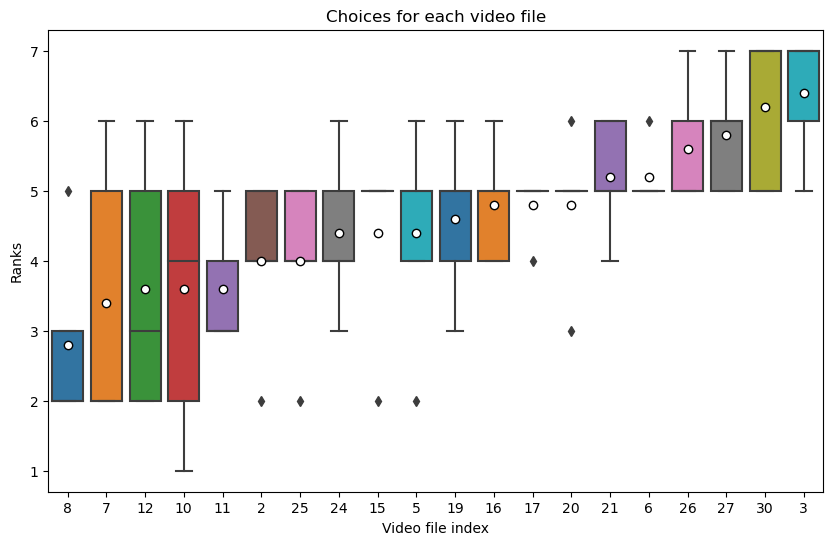

In [216]:
import seaborn as sns

# Create boxplot for each video file choice
plt.figure(figsize=(10, 6))
plt.title('Choices for each video file')
# Sort the video files by the mean choice
sorted_video_files = avatar_first_office_filtered.groupby('videoFile_idx')['choice'].mean().sort_values().index
# Create the boxplot
sns.boxplot(data=avatar_first_office_filtered, x='videoFile_idx', y='choice', order=sorted_video_files, palette='tab10', showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black'})
plt.xlabel('Video file index')
plt.ylabel('Ranks')

In [218]:
def print_pictures_from_indexes(index_list, video_frames_dict):
    num_indexes = len(index_list)
    
    # Define the number of columns for the grid
    num_cols = 5
    num_rows = (num_indexes + num_cols - 1) // num_cols  # Calculate the number of rows needed

    # Create a figure with a specified size
    plt.figure(figsize=(num_cols * 2, num_rows * 2))  # Adjust figure size as needed
    
    # Loop through each index in the list
    for i, idx in enumerate(index_list):
        if idx in video_frames_dict:
            frame_rgb = video_frames_dict[idx]
            
            # Add subplot to the grid
            plt.subplot(num_rows, num_cols, i + 1)
            plt.imshow(frame_rgb)
            plt.title(f"Index {idx}", fontsize=8)
            plt.axis('off')
        else:
            print(f"Index {idx} not found in video_frames_dict")
    
    # Adjust layout
    plt.tight_layout()
    # Show the grid
    plt.show()

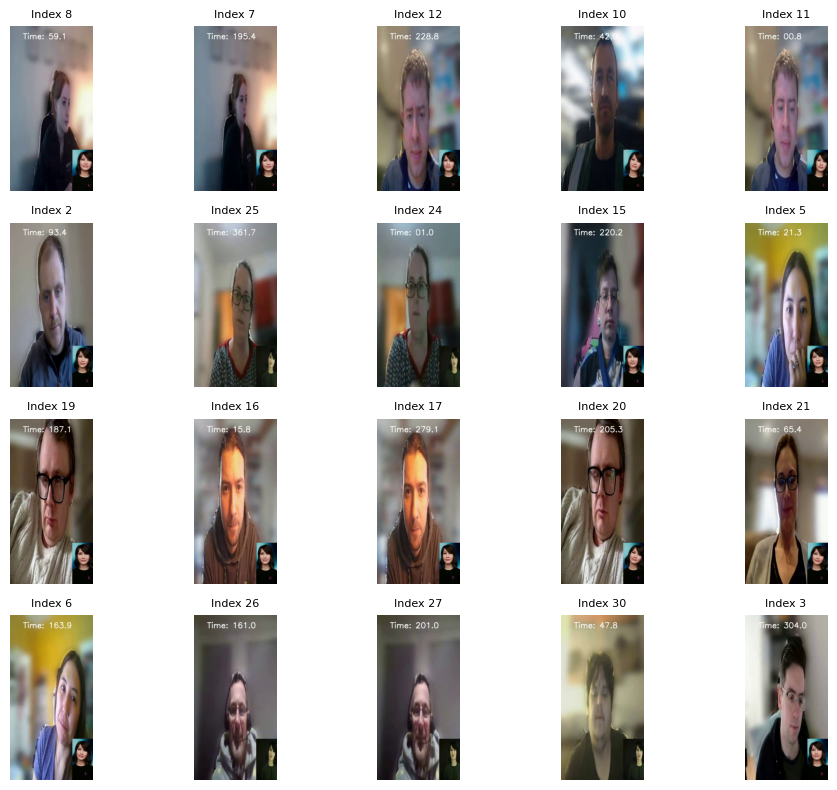

In [220]:
print_pictures_from_indexes(sorted_video_files, video_frames_dict)

Text(0, 0.5, 'Ranks')

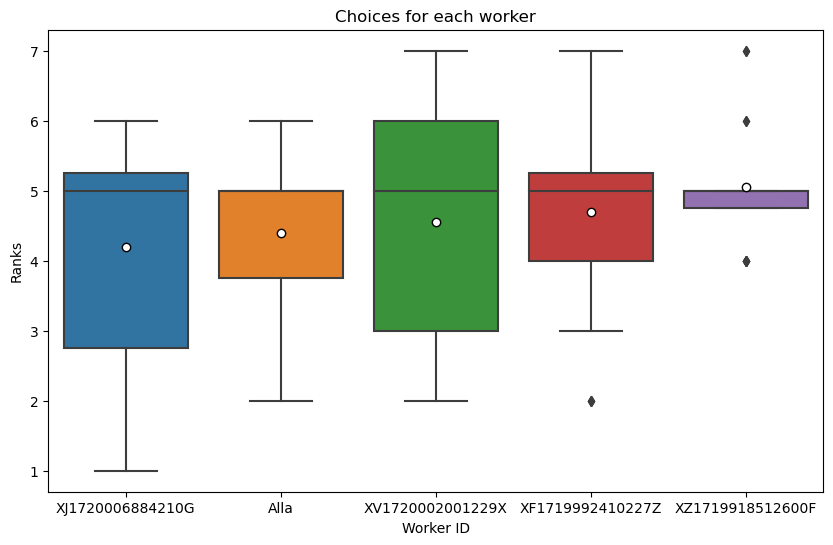

In [196]:
# Box plot of chices for each worker
plt.figure(figsize=(10, 6))
plt.title('Choices for each worker')
# Sort the workers by the mean choice
sorted_workers = avatar_first_office_filtered.groupby('workerID')['choice'].mean().sort_values().index
# Create the boxplot
sns.boxplot(data=avatar_first_office_filtered, x='workerID', y='choice', order=sorted_workers, palette='tab10', showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black'})
plt.xlabel('Worker ID')
plt.ylabel('Ranks')

In [165]:
def experiment_intent_sum(df):
  df = df.groupby(['videoFile', 'videoFile_idx']).agg(
      low=('choice', lambda x: (x == 1).sum() + (x == 2).sum() + (x == 3).sum()),
      indifferent=('choice', lambda x: (x == 4).sum()),
      high=('choice', lambda x: (x == 5).sum() + (x == 6).sum() + (x == 7).sum())
  ).reset_index()
  return df

avatar_first_office_intent = experiment_intent_sum(avatar_first_office_filtered)
avatar_first_office_intent

,videoFile,videoFile_idx,low,indifferent,high
0,Habit_formation_habit_validation_65e743d5c25ac...,7,3,0,2
1,Habit_formation_intro_65e7500fc25ac20fa0cbf4c9...,21,0,1,4
2,Hello_Hi_howareyou_65e744efc25ac20fa0cbc0ea_in...,11,3,1,1
3,Hobbies_hobby3_65e743d5c25ac20fa0cbbb0d_intera...,8,4,0,1
4,Hobbies_hobby3_65e744acc25ac20fa0cbbf32_intera...,10,2,1,2
5,Hobbies_hobby_65e73e9cc25ac20fa0cba3a5_interac...,5,1,1,3
6,Hobbies_hobby_65e74b87c25ac20fa0cbdff2_interac...,16,0,2,3
7,Hobbies_hobby_65f681cac25ac20fa0ceac4e_interac...,30,0,0,5
8,Introduction_Hi_howareyou_65f5e31fc25ac20fa0ce...,24,1,2,2
9,Media_Doesnt_watch_TV_65f5fbb3c25ac20fa0ce900f...,26,0,0,5


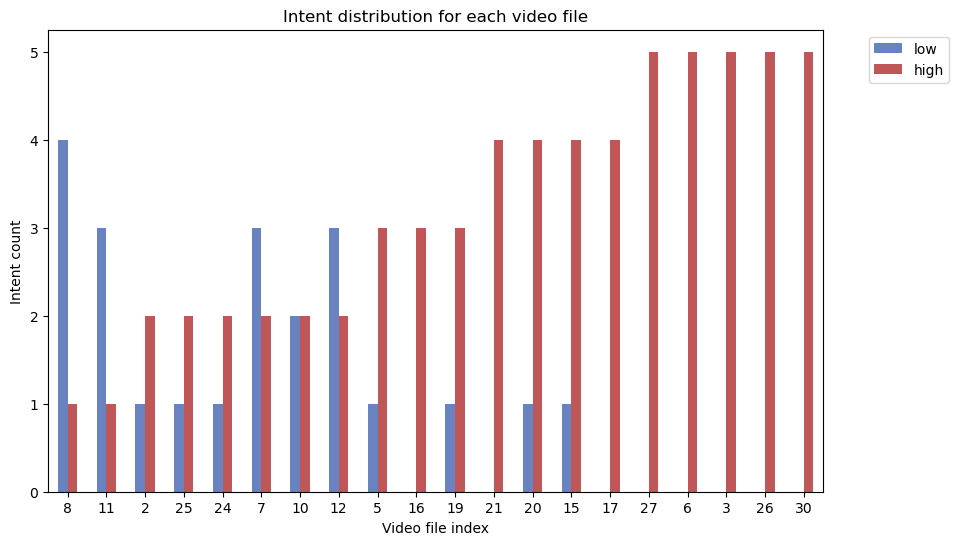

In [209]:
# Melt the DataFrame to long format for seaborn
df_long = avatar_first_office_intent.melt(id_vars='videoFile_idx', value_vars=['low', 'high'], var_name='Intent', value_name='Count')

# Create a bar plot for the intent
plt.figure(figsize=(10, 6))
plt.title('Intent distribution for each video file')

# Sort the video files by the high intent count
sorted_video_files = avatar_first_office_intent.groupby('videoFile_idx')['high'].sum().sort_values(ascending=True).index

# Create the bar plot with hue
barplot = sns.barplot(data=df_long, x='videoFile_idx', y='Count', hue='Intent', palette=['#597dce', '#d04648'], order=sorted_video_files, width=0.5)

# # Add labels on top of the bars
# for index, row in df_long.iterrows():
#     bar = barplot.patches[index]
#     bar_height = bar.get_height()
#     bar_x = bar.get_x() + bar.get_width() / 2
#     barplot.text(bar_x, bar_height, f'{int(bar_height)}', ha='center', va='bottom', color='black', fontsize=8)

plt.xlabel('Video file index')
plt.ylabel('Intent count')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# User-First experiment
### Tests interaction where only the avatar speaking